In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
import sklearn.svm as svm

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [2]:
df = pd.read_csv("モデル構築用.csv", encoding="sjis")
origin_columns = df.columns
df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]
df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2013/2/3,1.820570e+12,133504,3,2,3,502,0,182,182,...,0,1,2,0,0,0,0,6,0,0
1,2013/6/18,5.050290e+12,145329,5,99,0,1,2814,2814,505,...,0,0,1,2,1,0,0,0,0,0
2,2013/6/28,1.820590e+12,115136,5,99,0,1,2779,2779,182,...,1,0,1,1,0,8,1,0,0,0
3,2013/8/9,1.270660e+12,95034,5,99,0,1,223,223,127,...,0,1,2,0,0,0,0,0,0,0
4,2014/1/27,2.090350e+12,165240,5,99,0,1,1836,1836,209,...,0,0,2,0,0,0,0,0,0,0


In [3]:
df = df.drop(['offer_date', 'birth'], axis=1)
df.head()

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,1.820570e+12,133504,3,2,3,502,0,182,182,1,...,0,1,2,0,0,0,0,6,0,0
1,5.050290e+12,145329,5,99,0,1,2814,2814,505,1,...,0,0,1,2,1,0,0,0,0,0
2,1.820590e+12,115136,5,99,0,1,2779,2779,182,1,...,1,0,1,1,0,8,1,0,0,0
3,1.270660e+12,95034,5,99,0,1,223,223,127,1,...,0,1,2,0,0,0,0,0,0,0
4,2.090350e+12,165240,5,99,0,1,1836,1836,209,1,...,0,0,2,0,0,0,0,0,0,0


In [4]:
#trainとtestに分割
train_df, test_df = train_test_split(df, test_size = 0.1, random_state=0)

In [61]:
np.sum(train_df['month12_jiko']==1)

2908

In [26]:
np.array(train_df)

array([[5.72064e+12, 1.20956e+05, 4.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.20073e+12, 2.03034e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.17070e+12, 1.63012e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.20074e+12, 1.91818e+05, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.63113e+12, 1.93449e+05, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.30632e+11, 1.01822e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [47]:
hoge_list = random.sample(list(np.array(train_df)), np.array(train_df).shape[0])

In [48]:
len(hoge_list)

9565

In [49]:
np.sum(test_df['month12_jiko']==1)

150

In [64]:
count = 0
hoge_list = random.sample(list(np.array(train_df)), np.array(train_df).shape[0])
equal_train_list = []
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 1:
        equal_train_list.append(hoge_list[i])
        count += 1
    if count == np.sum(train_df['month12_jiko']==1):
        break
count = 0
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 0:
        equal_train_list.append(hoge_list[i])
        count += 1
    if count == np.sum(train_df['month12_jiko']==1):
        break
equal_train_list = random.sample(equal_train_list, len(equal_train_list))

In [65]:
count = 0
hoge_list = random.sample(list(np.array(test_df)), np.array(test_df).shape[0])
equal_test_list = []
for i in range(np.array(test_df).shape[0]):
    if hoge_list[i][34] == 1:
        equal_test_list.append(hoge_list[i])
        count += 1
    if count == np.sum(test_df['month12_jiko']==1):
        break
count = 0
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 0:
        equal_test_list.append(hoge_list[i])
        count += 1
    if count == np.sum(test_df['month12_jiko']==1):
        break
equal_test_list = random.sample(equal_test_list, len(equal_test_list))

In [76]:
train_X = pd.DataFrame(equal_train_list).drop(34,axis=1)
test_X = pd.DataFrame(equal_test_list).drop(34,axis=1)
train_y = pd.DataFrame(equal_train_list).iloc[:,34]
test_y = pd.DataFrame(equal_test_list).iloc[:,34]

In [78]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
#RF分類モデル作成
rf_cla = RandomForestClassifier(verbose = 1, n_estimators=100, max_depth=20)
rf_cla.fit(train_X,train_y)
pred_y_cla = rf_cla.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [80]:
#分類正解率
accuracy_score(test_y, pred_y_cla)

0.66

In [82]:
precision, recall, thresholds = roc_curve(test_y, pred_y_cla)
auc(precision, recall)

0.6599999999999999

In [83]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[ 98,  52],
       [ 50, 100]])

In [84]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [85]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

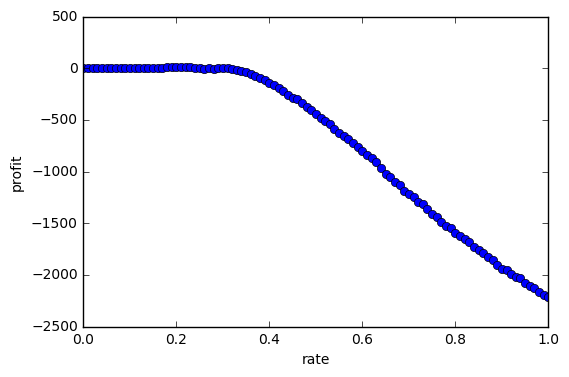

In [86]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

# ここからメイン=> スモートによるデータ水増し

In [63]:
from imblearn.over_sampling import SMOTE

In [109]:
#trainとtestに分割
train_df, test_df = train_test_split(df, test_size = 0.1, random_state=0)
train_X_df = train_df.drop('month12_jiko',axis=1)
test_X = test_df.drop('month12_jiko',axis=1)
train_y_df = train_df['month12_jiko']
test_y = test_df['month12_jiko']

In [110]:
sm = SMOTE(random_state=42)
train_X, train_y = sm.fit_sample(train_X_df, train_y_df)

In [111]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [112]:
#RF分類モデル作成
rf_cla = RandomForestClassifier(verbose = 1, n_estimators=100, max_depth=20)
rf_cla.fit(train_X,train_y)
pred_y_cla = rf_cla.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [113]:
#分類正解率
accuracy_score(test_y, pred_y_cla)

0.8598306679209784

In [114]:
precision, recall, thresholds = roc_curve(test_y, pred_y_cla)
auc(precision, recall)

0.5339759036144578

In [115]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.6828879152975539

In [116]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[902,  11],
       [138,  12]])

In [117]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [118]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

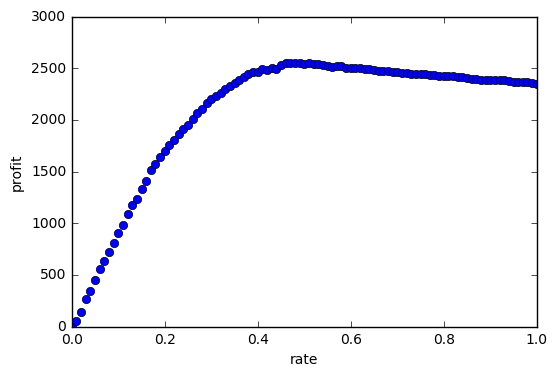

In [119]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [120]:
print(np.max(profit_list))
print(np.argmax(profit_list))

2552
47


In [121]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [122]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[889,  24],
       [120,  30]])

In [123]:
#営業利益の算出(一次関数_ver2)
def operating_profit_linear_ver2(y_pred_reg, y_pred_cla, y_test, offset_n, offset_m):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset_n:
            gain_list.append(0)
        elif i <= offset_n and i >= offset_m:
            gain_list.append(int((-45/(offset_n-offset_m))*i+(45*offset_n/(offset_n-offset_m))+5))
        elif i < offset_m:
            gain_list.append(50)
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [131]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        elif para_m == para_n:
            profit_list_m.append(int(45*para_n))
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [132]:
np.max(profit_list)

3433

In [133]:
profit_list_max_n = []
for i in range(len(profit_list)):
    profit_list_max_n.append(np.max(profit_list[i]))

In [134]:
np.argmax(profit_list_max_n)

28

In [135]:
np.max(profit_list_max_n)

3433

In [144]:
np.array(profit_list)[np.argmax(profit_list_max_n)][np.argmax(profit_list_max_n)-1]

3433

In [137]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(profit_list_max_n)+1)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [142]:
operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), threshold, threshold-0.01)[2]

3433

In [139]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[741, 172],
       [ 79,  71]])

In [140]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.6828879152975539

# アンサンブル

In [7]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
rf_pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [8]:
#lightBGM回帰モデル作成
model_reg = lgb.LGBMRegressor()
model_reg.fit(train_X, train_y)
bgm_pred_y_reg_array = model_reg.predict(test_X)
bgm_pred_y_reg = []
for i in bgm_pred_y_reg_array:
    if i >= 0:
        bgm_pred_y_reg.append(i)
    elif i < 0:
        bgm_pred_y_reg.append(0)
bgm_pred_y_reg = np.array(bgm_pred_y_reg)

In [9]:
#XGboost回帰モデル作成
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train_X, train_y)
xgb_pred_y_reg_array = xgb_reg.predict(np.array(test_X))
xgb_pred_y_reg = []
for i in xgb_pred_y_reg_array:
    if i >= 0:
        xgb_pred_y_reg.append(i)
    elif i < 0:
        xgb_pred_y_reg.append(0)
xgb_pred_y_reg = np.array(xgb_pred_y_reg)

In [10]:
#SVM回帰モデル作成
svc_reg = svm.SVR()
svc_reg.fit(train_X, train_y)
svc_pred_y_reg_array = svc_reg.predict(np.array(test_X))
svc_pred_y_reg = []
for i in svc_pred_y_reg_array:
    if i >= 0:
        svc_pred_y_reg.append(i)
    elif i < 0:
        svc_pred_y_reg.append(0)
svc_pred_y_reg = np.array(svc_pred_y_reg)

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
svc_pred_y_reg_array

array([0.46359076, 0.46359076, 0.46359076, ..., 0.46359076, 0.46359076,
       0.46359076])

In [11]:
pred_y_reg=(rf_pred_y_reg+bgm_pred_y_reg+xgb_pred_y_reg+svc_pred_y_reg)/4

In [15]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

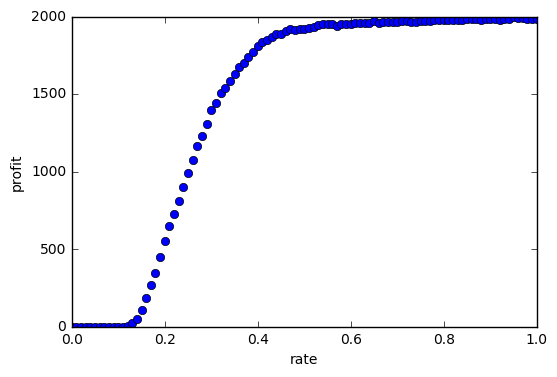

In [16]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [156]:
print(np.max(profit_list))
print(np.argmax(profit_list))

1995
97


In [126]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [127]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[894,  19],
       [129,  21]])

In [128]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [129]:
np.max(profit_list)

3379

In [130]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.7030887185104053

# アンサンブル(重みを考慮)

In [146]:
acu_rf = 1/mean_squared_error(test_y, rf_pred_y_reg)
acu_bgm =1/ mean_squared_error(test_y, bgm_pred_y_reg)
acu_xgb = 1/mean_squared_error(test_y, xgb_pred_y_reg)
#acu_svc = 1/mean_squared_error(test_y, svc_pred_y_reg)

In [147]:
sum_acu = acu_rf + acu_bgm + acu_xgb
pred_y_reg = (acu_rf*rf_pred_y_reg + acu_bgm*bgm_pred_y_reg + acu_xgb*xgb_pred_y_reg) / sum_acu

In [148]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

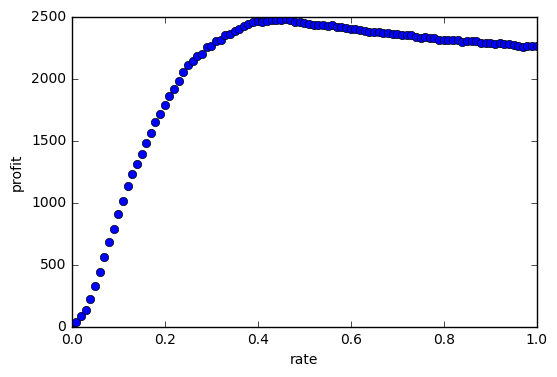

In [149]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [150]:
print(np.max(profit_list))
print(np.argmax(profit_list))

2478
46


In [151]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [152]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[897,  16],
       [131,  19]])

In [153]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        elif para_m == para_n:
            profit_list_m.append(int(45*para_n))
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [154]:
np.max(profit_list)

3472

In [155]:
profit_list_max_n = []
for i in range(len(profit_list)):
    profit_list_max_n.append(np.max(profit_list[i]))

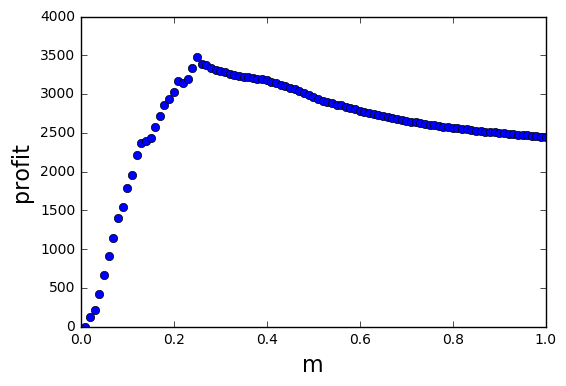

In [240]:
plt.figure()
plt.plot(para_list, profit_list_max_n, 'o')
plt.xlabel('m', fontsize=16)
plt.ylabel("profit", fontsize=16)
plt.ylim(0,4000)
plt.show()

In [156]:
np.argmax(profit_list_max_n)

24

In [157]:
np.max(profit_list_max_n)

3472

In [158]:
np.array(profit_list)[24][23]

3472

In [159]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(profit_list_max_n)+1)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [160]:
operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), threshold, threshold-0.01)[2]

3472

In [161]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[707, 206],
       [ 70,  80]])

In [162]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.7031763417305587

In [163]:
precision, recall, thresholds = roc_curve(test_y, binary_pred_y_reg)
auc(precision, recall)

0.6538517707192406

# モデル比較RF

In [241]:
para_list = [i*0.01 for i in range(1,101)]
rf_profit_list = []
for para_n in para_list:
    profit_list_m = []
    rf_binary_pred_y_reg = []
    for j in rf_pred_y_reg:
        if j > para_n:
            rf_binary_pred_y_reg.append(1)
        elif j <= para_n:
            rf_binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(rf_pred_y_reg, rf_binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    rf_profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [242]:
np.max(rf_profit_list)

3441

In [244]:
rf_profit_list_max_n = []
for i in range(len(rf_profit_list)):
    rf_profit_list_max_n.append(np.max(rf_profit_list[i]))

In [247]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(rf_profit_list_max_n)+1)/100
rf_binary_pred_y_reg = []
for i in rf_pred_y_reg:
    if i > threshold:
        rf_binary_pred_y_reg.append(1)
    elif i <= threshold:
        rf_binary_pred_y_reg.append(0)
operating_profit_linear_ver2(rf_pred_y_reg, rf_binary_pred_y_reg, list(test_y), threshold, threshold-0.01)[2]

3441

In [249]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, rf_binary_pred_y_reg, labels=[0,1])

array([[699, 214],
       [ 71,  79]])

In [251]:
precision, recall, thresholds = roc_curve(test_y, rf_binary_pred_y_reg)
auc(precision, recall)

0.6461372763782403

# モデル比較LightGBM

In [252]:
para_list = [i*0.01 for i in range(1,101)]
bgm_profit_list = []
for para_n in para_list:
    profit_list_m = []
    bgm_binary_pred_y_reg = []
    for j in bgm_pred_y_reg:
        if j > para_n:
            bgm_binary_pred_y_reg.append(1)
        elif j <= para_n:
            bgm_binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(bgm_pred_y_reg, bgm_binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    bgm_profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [254]:
np.max(bgm_profit_list)

3256

In [255]:
bgm_profit_list_max_n = []
for i in range(len(bgm_profit_list)):
    bgm_profit_list_max_n.append(np.max(bgm_profit_list[i]))

In [256]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(bgm_profit_list_max_n)+1)/100
bgm_binary_pred_y_reg = []
for i in bgm_pred_y_reg:
    if i > threshold:
        bgm_binary_pred_y_reg.append(1)
    elif i <= threshold:
        bgm_binary_pred_y_reg.append(0)
operating_profit_linear_ver2(bgm_pred_y_reg, bgm_binary_pred_y_reg, list(test_y), threshold, threshold-0.01)[2]

3256

In [257]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, bgm_binary_pred_y_reg, labels=[0,1])

array([[828,  85],
       [104,  46]])

In [266]:
precision, recall, thresholds = roc_curve(test_y, bgm_binary_pred_y_reg)
auc(precision, recall)

0.6067834976268711

# モデル比較XGBoost

In [259]:
para_list = [i*0.01 for i in range(1,101)]
xgb_profit_list = []
for para_n in para_list:
    profit_list_m = []
    xgb_binary_pred_y_reg = []
    for j in xgb_pred_y_reg:
        if j > para_n:
            xgb_binary_pred_y_reg.append(1)
        elif j <= para_n:
            xgb_binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(xgb_pred_y_reg, xgb_binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    xgb_profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [260]:
np.max(xgb_profit_list)

3070

In [261]:
xgb_profit_list_max_n = []
for i in range(len(xgb_profit_list)):
    xgb_profit_list_max_n.append(np.max(xgb_profit_list[i]))

In [262]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(xgb_profit_list_max_n)+1)/100
xgb_binary_pred_y_reg = []
for i in xgb_pred_y_reg:
    if i > threshold:
        xgb_binary_pred_y_reg.append(1)
    elif i <= threshold:
        xgb_binary_pred_y_reg.append(0)
operating_profit_linear_ver2(xgb_pred_y_reg, xgb_binary_pred_y_reg, list(test_y), threshold, threshold-0.01)[2]

3070

In [264]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, xgb_binary_pred_y_reg, labels=[0,1])

array([[800, 113],
       [101,  49]])

In [265]:
precision, recall, thresholds = roc_curve(test_y, xgb_binary_pred_y_reg)
auc(precision, recall)

0.6014494341000365

# 金額割り当てコード

In [165]:
submit_df = pd.read_csv("検証用.csv", encoding="sjis")
origin_columns = submit_df.columns
submit_df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]
submit_df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2017/7/1,3.280000e+12,165952,2,2,1,502,0,328,328,...,0,0,1,0,0,0,3,0,0,NaN
1,2017/7/1,3.450000e+12,114538,1,99,1,1,1195,1195,345,...,1,0,1,0,0,4,0,0,0,NaN
2,2017/7/1,2.090000e+12,143126,5,99,1,1,247,247,209,...,0,0,1,0,0,0,0,0,0,NaN
3,2017/7/1,1.110000e+11,85715,1,99,1,1701,0,11,11,...,0,0,1,0,0,0,0,0,0,NaN
4,2017/7/2,5.050000e+12,211042,3,26,3,502,0,505,505,...,0,0,1,1,0,0,2,0,0,NaN


In [179]:
submit_df

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2017/7/1,3.280000e+12,165952,2,2,1,502,0,328,328,...,0,0,1,0,0,0,3,0,0,NaN
1,2017/7/1,3.450000e+12,114538,1,99,1,1,1195,1195,345,...,1,0,1,0,0,4,0,0,0,NaN
2,2017/7/1,2.090000e+12,143126,5,99,1,1,247,247,209,...,0,0,1,0,0,0,0,0,0,NaN
3,2017/7/1,1.110000e+11,85715,1,99,1,1701,0,11,11,...,0,0,1,0,0,0,0,0,0,NaN
4,2017/7/2,5.050000e+12,211042,3,26,3,502,0,505,505,...,0,0,1,1,0,0,2,0,0,NaN
5,2017/7/2,1.270000e+12,10128,1,99,3,1701,0,127,127,...,0,0,2,1,0,0,0,0,0,NaN
6,2017/7/2,1.270000e+12,185528,5,99,3,1,2841,2841,127,...,1,0,1,1,1,2,0,0,0,NaN
7,2017/7/2,1.110000e+11,144226,5,99,3,1,917,917,11,...,0,0,2,0,0,0,0,0,0,NaN
8,2017/7/2,2.110000e+11,134847,5,99,3,1,2967,2967,21,...,0,0,1,3,2,0,1,9,0,NaN
9,2017/7/2,2.010000e+11,153028,1,99,3,101,1214,1214,20,...,0,0,2,0,0,0,0,0,0,NaN


In [166]:
submit_test_df = submit_df.drop(['offer_date', 'birth'], axis=1)
submit_test_df.head()

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,3.280000e+12,165952,2,2,1,502,0,328,328,1,...,0,0,1,0,0,0,3,0,0,NaN
1,3.450000e+12,114538,1,99,1,1,1195,1195,345,2,...,1,0,1,0,0,4,0,0,0,NaN
2,2.090000e+12,143126,5,99,1,1,247,247,209,1,...,0,0,1,0,0,0,0,0,0,NaN
3,1.110000e+11,85715,1,99,1,1701,0,11,11,1,...,0,0,1,0,0,0,0,0,0,NaN
4,5.050000e+12,211042,3,26,3,502,0,505,505,2,...,0,0,1,1,0,0,2,0,0,NaN


In [180]:
#trainとtestに分割
#train_df, test_df = train_test_split(df, test_size = 0.1, random_state=0)
#train_X = train_df.drop('month12_jiko',axis=1)
submit_test_X = submit_test_df.drop('month12_jiko',axis=1)
#train_y = train_df['month12_jiko']
submit_test_y = submit_test_df['month12_jiko']

In [192]:
rf_submit_y_reg = rf_reg.predict(submit_test_X)

bgm_submit_y_reg_array = model_reg.predict(submit_test_X)
bgm_submit_y_reg = []
for i in bgm_submit_y_reg_array:
    if i >= 0:
        bgm_submit_y_reg.append(i)
    elif i < 0:
        bgm_submit_y_reg.append(0)
bgm_submit_y_reg = np.array(bgm_submit_y_reg)

xgb_submit_y_reg_array = xgb_reg.predict(np.array(submit_test_X))
xgb_submit_y_reg = []
for i in xgb_submit_y_reg_array:
    if i >= 0:
        xgb_submit_y_reg.append(i)
    elif i < 0:
        xgb_submit_y_reg.append(0)
xgb_submit_y_reg = np.array(xgb_submit_y_reg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [198]:
submit_y_reg = (acu_rf*rf_submit_y_reg + acu_bgm*bgm_submit_y_reg + acu_xgb*xgb_submit_y_reg) / sum_acu

In [199]:
#最大利益の場合をバイナリ化
threshold = (np.argmax(profit_list_max_n)+1)/100
binary_submit_y_reg = []
for i in submit_y_reg:
    if i > threshold:
        binary_submit_y_reg.append(1)
    elif i <= threshold:
        binary_submit_y_reg.append(0)

In [200]:
len(binary_submit_y_reg)

1017

In [201]:
print(binary_submit_y_reg.count(0))
print(binary_submit_y_reg.count(1))

777
240


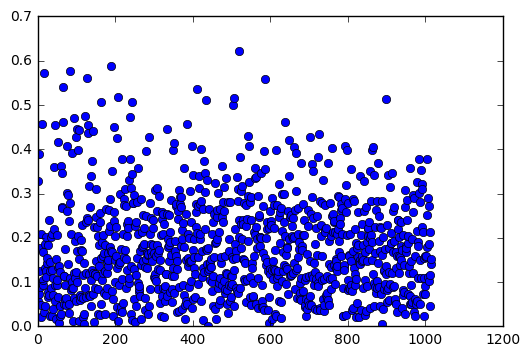

In [202]:
plt.figure()
plt.plot(list(submit_y_reg), 'o')
plt.show()

In [206]:
#営業利益の算出(一次関数_ver2)をテストデータなしで
def operating_profit_linear_ver3(y_pred_reg, y_pred_cla, offset_n, offset_m):
    #gain_list = []
    #loss_list = []
    if y_pred_cla == 1:
        return 0
    elif y_pred_cla == 0:
        if y_pred_reg <= offset_n and y_pred_reg >= offset_m:
            return int((-45/(offset_n-offset_m))*y_pred_reg+(45*offset_n/(offset_n-offset_m))+5)
        elif y_pred_reg < offset_m:
            return 50

In [207]:
gain_submit_list = []
for i in range(len(binary_submit_y_reg)):
    gain_submit_list.append(operating_profit_linear_ver3(submit_y_reg[i], binary_submit_y_reg[i], threshold, threshold-0.01))

In [222]:
gain_submit_list

[0,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 47,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 0,
 0,
 50,
 0,
 50,
 50,
 50,
 0,
 0,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 0,
 50,
 50,
 50,
 0,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 0,
 26,
 0,
 50,
 0,
 50,
 0,
 50,
 0,
 50,
 0,
 50,
 50,
 50,
 0,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 19,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 0,
 50,
 0,
 0,
 50,
 50,
 50,
 50,
 0,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 0,
 50,
 

In [223]:
gain_submit_list = [i*10000 for i in gain_submit_list]

In [224]:
gain_submit_list

[0,
 500000,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 470000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 0,
 0,
 0,
 0,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 0,
 0,
 500000,
 0,
 500000,
 500000,
 500000,
 0,
 0,
 500000,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 0,
 500000,
 500000,
 500000,
 0,
 0,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 0,
 500000,
 5000

In [225]:
submit_df['month12_jiko'] = np.array(gain_submit_list)

In [228]:
submit_df = submit_df.rename(columns={'month12_jiko': '貸付金額'})

In [232]:
submit_df

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,貸付金額
0,2017/7/1,3.280000e+12,165952,2,2,1,502,0,328,328,...,0,0,1,0,0,0,3,0,0,0
1,2017/7/1,3.450000e+12,114538,1,99,1,1,1195,1195,345,...,1,0,1,0,0,4,0,0,0,500000
2,2017/7/1,2.090000e+12,143126,5,99,1,1,247,247,209,...,0,0,1,0,0,0,0,0,0,500000
3,2017/7/1,1.110000e+11,85715,1,99,1,1701,0,11,11,...,0,0,1,0,0,0,0,0,0,500000
4,2017/7/2,5.050000e+12,211042,3,26,3,502,0,505,505,...,0,0,1,1,0,0,2,0,0,500000
5,2017/7/2,1.270000e+12,10128,1,99,3,1701,0,127,127,...,0,0,2,1,0,0,0,0,0,0
6,2017/7/2,1.270000e+12,185528,5,99,3,1,2841,2841,127,...,1,0,1,1,1,2,0,0,0,500000
7,2017/7/2,1.110000e+11,144226,5,99,3,1,917,917,11,...,0,0,2,0,0,0,0,0,0,500000
8,2017/7/2,2.110000e+11,134847,5,99,3,1,2967,2967,21,...,0,0,1,3,2,0,1,9,0,500000
9,2017/7/2,2.010000e+11,153028,1,99,3,101,1214,1214,20,...,0,0,2,0,0,0,0,0,0,500000


In [233]:
submit_df.to_csv('提出サンプル1.csv')